# Atividade: Comparação de Modelos de Classificação

## Objetivo

- Comparar os seguintes modelos de classificação:
  * Árvore de Decisão com poda
  * K Vizinhos mais Próximos (KNN)
  * Regressão Logística
  * Floresta Aleatória
- Escolher o melhor modelo com base no desempenho em validação
- Avaliar o melhor modelo no conjunto de teste

## Etapas

1. **Carregar o dataset** 

2. **Separar os dados em treino, validação e teste** (60%, 20%, 20%)  

3. **Treinar os seguintes modelos:**

   a) **Árvore de Decisão com poda por complexidade**    
      - Para poda: use o método `cost_complexity_pruning_path`  
      - Varra diferentes valores de `ccp_alpha` e escolha o melhor na validação  

   b) **KNN (K-Nearest Neighbors)**   
      - Teste para `k = 3, 5, 10, 20`

   c) **Regressão Logística (sem ajustar hiperparâmetros)**    

   d) **Floresta Aleatória**  
      - Fixe `n_estimators=100`  
      - Teste combinações de `criterion = ['gini', 'entropy']` e `max_features = ['sqrt', 'log2', None]`

4. **Para cada modelo (usando apenas o conjunto de validação), calcule:**
   - Acurácia;
   - Precisão;
   - Recall;
   - F1-score.

5. **Monte uma tabela** com uma linha por modelo e colunas:  
   `'acuracia'`, `'precisao'`, `'recall'`, `'f1'`

6. **Escolha o melhor modelo com base nas métricas de validação.**  
   - Avalie esse único modelo no conjunto de teste.  

7. **Exiba as importâncias usando Floresta Aleatória:**  
   - Mostre um gráfico com as 20 variáveis mais importantes  

8. **Utilizando apenas as 5 covariadas mais importantes encontradas no item anterior, rode todos os modelos novamente e compare os melhores modelos encontrados usando todas as covariadas e os melhores modelos encontrados usando apenas as 5 mais importantes**


In [ ]:
# 1. Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Lendo os dados
dados = pd.read_csv("dataset_classificacao.csv")

In [3]:
dados.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x491,x492,x493,x494,x495,x496,x497,x498,x499,target
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.002208,-0.052903,-0.022030,-0.026133,-0.038229,-0.010983,-0.014680,0.023538,-0.001115,0.032142,...,0.002209,-0.005306,-0.029015,-0.017471,-0.027823,-0.007417,0.011903,-0.008288,0.021233,0.500000
std,0.988865,1.024216,0.979032,0.982509,1.006441,1.013829,1.001866,1.019192,0.987066,1.026590,...,0.995983,0.987312,0.981562,1.017215,1.024805,0.976780,1.001736,0.992198,1.002773,0.500125
min,-3.856338,-3.940590,-3.219429,-3.160356,-4.004341,-3.801886,-2.839884,-3.349474,-3.127409,-3.070326,...,-3.681040,-3.994068,-3.305523,-4.189234,-3.405075,-4.004546,-3.304477,-3.699891,-3.375917,0.000000
25%,-0.661629,-0.729571,-0.687952,-0.717622,-0.704893,-0.707195,-0.676710,-0.645530,-0.671097,-0.658435,...,-0.663949,-0.681720,-0.689221,-0.686963,-0.716227,-0.672862,-0.647106,-0.700606,-0.634595,0.000000
50%,0.014368,-0.024311,-0.013671,-0.021838,-0.051575,0.003139,-0.038906,0.038314,-0.031276,0.013729,...,-0.000102,0.007509,-0.024995,0.008577,-0.019640,0.010243,0.025650,-0.011689,0.028363,0.500000
75%,0.671257,0.617950,0.663016,0.659948,0.633341,0.671310,0.648396,0.682809,0.654106,0.755315,...,0.675856,0.661029,0.640198,0.690945,0.654147,0.657163,0.707594,0.686621,0.691615,1.000000
max,3.269907,3.727833,2.969216,3.196208,3.512065,4.065773,3.489848,3.490589,3.989945,3.878217,...,3.089251,3.025290,3.508802,3.467730,3.574129,2.990327,3.815528,3.193703,4.005885,1.000000


In [4]:
dados['target'].value_counts() # balanceado

target
1    1000
0    1000
Name: count, dtype: int64

In [5]:
X = dados.drop(columns = ['target'])
y = dados.target

In [ ]:
# separando em teste e validacao
# Dividir os dados em treino, validacao e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=5202)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=5202)
# (60% treino, 20% validação, 20% teste)


## Arvore de Decisão

In [ ]:
model_DecisionTree = DecisionTreeClassifier(random_state = 5202)
path = model_DecisionTree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, total_leaf_mse = path.ccp_alphas, path.impurities
# Treinar modelos com diferentes alphas
modelos_Arv = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=5202, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    modelos_Arv.append(clf)

# Remover último modelo nulo
modelos_Arv = modelos_Arv[:-1]
ccp_alphas = ccp_alphas[:-1]



In [ ]:
# Avaliar desempenho com RMSE nos três conjuntos
train_rmse = [np.sqrt(mean_squared_error(y_train, clf.predict(X_train))) for clf in modelos_Arv]
val_rmse = [np.sqrt(mean_squared_error(y_val, clf.predict(X_val))) for clf in modelos_Arv]
test_rmse = [np.sqrt(mean_squared_error(y_test, clf.predict(X_test))) for clf in modelos_Arv]

# Encontrar o índice da árvore com menor erro de validação
best_idx = np.argmin(val_rmse)

# Melhor árvore
best_tree = modelos_Arv[best_idx]

# Melhor Alpha
ccp_alphas[best_idx]
final_model_DecisionTree = DecisionTreeClassifier(ccp_alpha=ccp_alphas[best_idx], random_state=5202)
final_model_DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.008475447016751361),
                       random_state=5202)

In [ ]:
# Predicao
y_pred_DecisioTree = final_model_DecisionTree.predict(X_val)

# Desempenho
Acuracia_DecisionTree = accuracy_score(y_val, y_pred_DecisioTree )
Precision_DecisionTree = precision_score(y_val,y_pred_DecisioTree )
Recall_DecisionTree = recall_score(y_val,y_pred_DecisioTree )
F1_DecisionTree = f1_score(y_val,y_pred_DecisioTree )

In [ ]:
# Apresentando resultados
print("Acurácia: {:.4f} | Precisão: {:.4f} | Recall: {:.4f} | F1 Score: {:.4f}".format(
    Acuracia_DecisionTree, Precision_DecisionTree, Recall_DecisionTree, F1_DecisionTree))


Acurácia: 0.8925 | Precisão: 0.8905 | Recall: 0.8950 | F1 Score: 0.8928


## KNN

In [ ]:
# Testar vários valores de K
k_values = [3,5,10,20]
train_acc = []
val_acc = []

for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    
    # Acurácia treino e validação
    train_acc.append(accuracy_score(y_train, model_knn.predict(X_train)))
    val_acc.append(accuracy_score(y_val, model_knn.predict(X_val)))

# Melhor K (aquele que maximizou a validação)
best_k = k_values[np.argmax(val_acc)]
print(f'Melhor K encontrado (validação): {best_k}')

# Avaliar no conjunto de teste
final_model_knn = KNeighborsClassifier(n_neighbors = best_k)
final_model_knn.fit(X_train_val, y_train_val)  # Treina em treino+validação agora
test_acc = accuracy_score(y_test, final_model_knn.predict(X_test))
print(f'Acurácia no conjunto de teste com K={best_k}: {test_acc:.3f}')

Melhor K encontrado (validação): 20
Acurácia no conjunto de teste com K=20: 0.775


In [ ]:
# Predicao
y_pred_knn = final_model_knn.predict(X_val)

# Desempenho
Acuracia_knn = accuracy_score(y_val, y_pred_knn)
Precision_knn = precision_score(y_val,y_pred_knn)
Recall_knn = recall_score(y_val,y_pred_knn)
F1_knn = f1_score(y_val,y_pred_knn)

In [ ]:
# Apresentando os resultados
print("Acurácia: {:.4f} | Precisão: {:.4f} | Recall: {:.4f} | F1 Score: {:.4f}".format(Acuracia_knn,Precision_knn, Recall_knn, F1_knn))

Acurácia: 0.8500 | Precisão: 0.8723 | Recall: 0.8200 | F1 Score: 0.8454


## Logistica

In [ ]:
model_logist = LogisticRegression(random_state=5202)
model_logist.fit(X_train,y_train) # ajuste


0.68

In [ ]:
# Predicao 
y_pred_logist = model_logist.predict(X_val)

# Desempenho
Acuracia_logist = accuracy_score(y_val, y_pred_logist)
Precision_logist = precision_score(y_val,y_pred_logist)
Recall_logist = recall_score(y_val,y_pred_logist)
F1_logist = f1_score(y_val,y_pred_logist)

In [ ]:
# Apresentando os resultaos
print("Acurácia: {:.4f} | Precisão: {:.4f} | Recall: {:4f} | F1 Score: {:.4f}".format(Acuracia_logist, Precision_logist, Recall_logist, F1_logist))

Acurácia: 0.6800 | Precisão: 0.6818 | Recall: 0.675000 | F1 Score: 0.6784


## Random Forest

In [ ]:
# Parametros do modelo
max_features = ['sqrt', 'log2', None]
criterio = ['gini','entropy']

# Armazenamento do desempenho
val_score_df = pd.DataFrame({"Criterio":[],
               "Feature":[],
               "Acurácia":[],
               "Precisão":[],
               "Recall":[],
               "F1_Score":[]})

# loop para modelos e calculos
for crit in criterio:
    for feat in max_features:
        model_RF = RandomForestClassifier(n_estimators=100,criterion=crit, max_features=feat, random_state=5202)
        model_RF.fit(X_train,y_train)
        y_pred_randomf = model_RF.predict(X_val)
        Accuracy_RF = accuracy_score(y_val,y_pred_randomf)
        Precision_RF = precision_score(y_val,y_pred_randomf)
        Recall_RF = recall_score(y_val,y_pred_randomf)
        F1_RF = f1_score(y_val,y_pred_randomf)
        # Adicionar uma nova linha
        new_row = {'Criterio': crit,
                   'Feature': feat,
                   'Acurácia': Accuracy_RF,
                   'Precisão': Precision_RF,
                   'Recall': Recall_RF,
                   'F1_Score': F1_RF}
        val_score_df = pd.concat([val_score_df, pd.DataFrame([new_row])], ignore_index=True)
        

In [ ]:
val_score_df

,Criterio,Feature,Acurácia,Precisão,Recall,F1_Score
0,gini,sqrt,0.8475,0.832536,0.870,0.850856
1,gini,log2,0.7700,0.781250,0.750,0.765306
2,gini,None,0.8925,0.890547,0.895,0.892768
3,entropy,sqrt,0.8575,0.838863,0.885,0.861314
4,entropy,log2,0.7750,0.805556,0.725,0.763158
5,entropy,None,0.8800,0.880000,0.880,0.880000


In [19]:
# Melhor K (aquele que maximizou a validação)
best_acc = np.argmax(val_score_df["Acurácia"])
print(f'Melhor modelo encontrado (validação):\n {val_score_df.iloc[best_acc]}')

# # Avaliar no conjunto de teste
final_model_RF = RandomForestClassifier(n_estimators=100,criterion='gini', max_features=None)
final_model_RF.fit(X_train, y_train)

Melhor modelo encontrado (validação):
 Criterio        gini
Feature         None
Acurácia      0.8925
Precisão    0.890547
Recall         0.895
F1_Score    0.892768
Name: 2, dtype: object


RandomForestClassifier(max_features=None)

## Comparação dos modelos

In [ ]:
Df_Comparacao = pd.DataFrame({"Modelo": ["Decision Tree","KNN","Reg. Logistíca","Floresta Aleatória"],
                 "Acurácia":[Acuracia_DecisionTree,Acuracia_knn,Acuracia_logist,Accuracy_RF],
                 "Precisão": [Precision_DecisionTree,Precision_knn,Precision_logist,Precision_RF],
                 "Recall": [Recall_DecisionTree,Recall_knn,Recall_logist,Recall_RF],
                 "F1_Score": [F1_DecisionTree,F1_knn,F1_logist,F1_RF]})


In [ ]:
Df_Comparacao.sort_values(by='Acurácia',ascending=False)

,Modelo,Acurácia,Precisão,Recall,F1_Score
0,Decision Tree,0.8925,0.890547,0.895,0.892768
3,Floresta Aleatória,0.8800,0.880000,0.880,0.880000
1,KNN,0.8500,0.872340,0.820,0.845361
2,Reg. Logistíca,0.6800,0.681818,0.675,0.678392


## Avaliando no conjunto de teste

In [22]:
final_model_DecisionTree = DecisionTreeClassifier(ccp_alpha=ccp_alphas[best_idx], random_state=5202)
final_model_DecisionTree.fit(X_train, y_train)
y_final_pred = final_model_DecisionTree.predict(X_test)

Accuracy_mod_final = accuracy_score(y_test,y_final_pred)
Precision_mod_final = precision_score(y_test,y_final_pred)
Recall_mod_final = recall_score(y_test,y_final_pred)
F1_mod_final = f1_score(y_test,y_final_pred)

Df_modelo_final = pd.DataFrame({
    "Modelo" : ["Decision Tree"],
    "Acurácia": [Accuracy_mod_final],
    "Precision": [Precision_mod_final],
    "Recall": [Recall_mod_final],
    "F1_Score": [F1_mod_final]
}) 
Df_modelo_final

,Modelo,Acurácia,Precision,Recall,F1_Score
0,Decision Tree,0.895,0.893204,0.901961,0.897561


## Exibindo as features mais importantes usando Random Forest

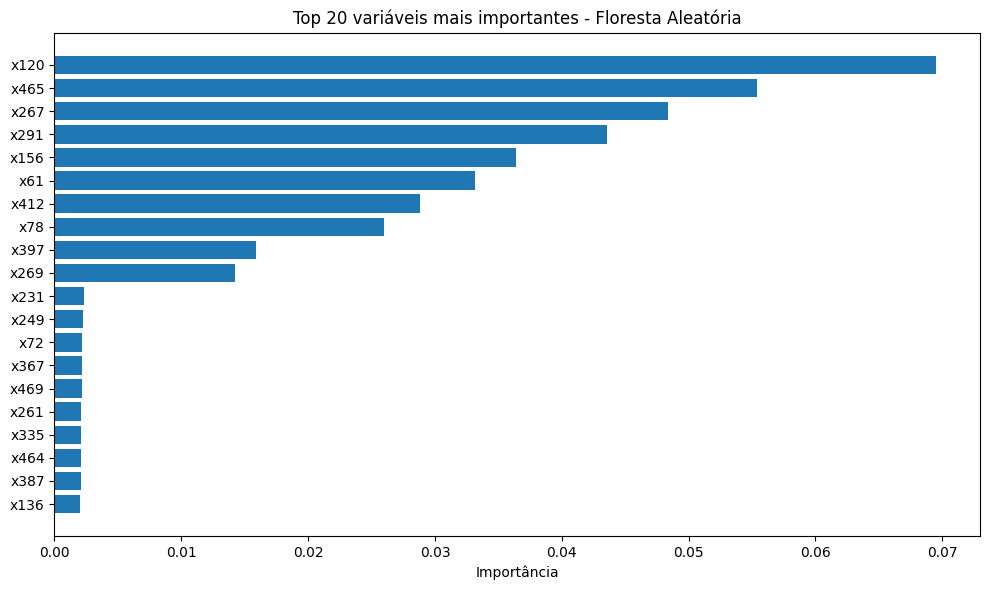

In [32]:
forest = RandomForestClassifier(n_estimators=100,random_state=5202)
forest.fit(X, y)

# Importâncias
importances = forest.feature_importances_
feature_names = X.columns
df_importancia = pd.DataFrame({
    'variavel': feature_names,
    'importancia': importances
}).sort_values(by='importancia', ascending=False)



best_20 = df_importancia.head(20)
# Plot
plt.figure(figsize=(10, 6))
plt.barh(best_20['variavel'], best_20['importancia'])
plt.gca().invert_yaxis()  # Coloca a mais importante no topo
plt.title('As 20 variáveis mais importantes - Floresta Aleatória')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()


## Conclusão
Olhando para o gráfico, nota-se que as 10 primeiras variáveis tem valores mais expressivos que as outras abaixo delas, considerando que temos, ao todo, 500 variáveis, pode-se dizer que estas 10 tem uma importância notoriamente maior que as outras. Além disso, as 5 primeiras tem um valor maior que 3.5%, o que é bem significativo pelo número de features.

## Testando os modelos com as covariáveis mais importantes de acordo com a Floresta Aleatória

In [38]:
X = dados[['x120','x465','x267','x291','x156']]
y = dados.target

# separando em teste e validacao
# Dividir os dados em treino, validacao e teste
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=5202)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=5202)
# (60% treino, 20% validação, 20% teste)


In [39]:
# Arvore de Decisao
model_DecisionTree = DecisionTreeClassifier(random_state = 5202)
path = model_DecisionTree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, total_leaf_mse = path.ccp_alphas, path.impurities
# Treinar modelos com diferentes alphas
modelos_Arv = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=5202, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    modelos_Arv.append(clf)

# Remover último modelo nulo
modelos_Arv = modelos_Arv[:-1]
ccp_alphas = ccp_alphas[:-1]

# Avaliar desempenho com RMSE nos três conjuntos
train_rmse = [np.sqrt(mean_squared_error(y_train, clf.predict(X_train))) for clf in modelos_Arv]
val_rmse = [np.sqrt(mean_squared_error(y_val, clf.predict(X_val))) for clf in modelos_Arv]
test_rmse = [np.sqrt(mean_squared_error(y_test, clf.predict(X_test))) for clf in modelos_Arv]

# Encontrar o índice da árvore com menor erro de validação
best_idx = np.argmin(val_rmse)

# Melhor árvore
best_tree = modelos_Arv[best_idx]

# Melhor Alpha
ccp_alphas[best_idx]
final_model_DecisionTree = DecisionTreeClassifier(ccp_alpha=ccp_alphas[best_idx], random_state=5202)
final_model_DecisionTree.fit(X_train, y_train)

# Predicao
y_pred_DecisioTree = final_model_DecisionTree.predict(X_val)

# Desempenho
Acuracia_DecisionTree = accuracy_score(y_val, y_pred_DecisioTree )
Precision_DecisionTree = precision_score(y_val,y_pred_DecisioTree )
Recall_DecisionTree = recall_score(y_val,y_pred_DecisioTree )
F1_DecisionTree = f1_score(y_val,y_pred_DecisioTree )

# Apresentando resultados
print("Acurácia: {:.4f} | Precisão: {:.4f} | Recall: {:.4f} | F1 Score: {:.4f}".format(
    Acuracia_DecisionTree, Precision_DecisionTree, Recall_DecisionTree, F1_DecisionTree))


Acurácia: 0.9000 | Precisão: 0.9167 | Recall: 0.8800 | F1 Score: 0.8980


In [40]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Testar vários valores de K
k_values = [3,5,10,20]
train_acc = []
val_acc = []

for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    
    # Acurácia treino e validação
    train_acc.append(accuracy_score(y_train, model_knn.predict(X_train)))
    val_acc.append(accuracy_score(y_val, model_knn.predict(X_val)))

# Melhor K (aquele que maximizou a validação)
best_k = k_values[np.argmax(val_acc)]
print(f'Melhor K encontrado (validação): {best_k}')

# Avaliar no conjunto de teste
final_model_knn = KNeighborsClassifier(n_neighbors = best_k)
final_model_knn.fit(X_train_val, y_train_val)  # Treina em treino+validação agora
test_acc = accuracy_score(y_test, final_model_knn.predict(X_test))
print(f'Acurácia no conjunto de teste com K={best_k}: {test_acc:.3f}')

# Predicao
y_pred_knn = final_model_knn.predict(X_val)

# Desempenho
Acuracia_knn = accuracy_score(y_val, y_pred_knn)
Precision_knn = precision_score(y_val,y_pred_knn)
Recall_knn = recall_score(y_val,y_pred_knn)
F1_knn = f1_score(y_val,y_pred_knn)

# Apresentando os resultados
print("Acurácia: {:.4f} | Precisão: {:.4f} | Recall: {:.4f} | F1 Score: {:.4f}".format(Acuracia_knn,Precision_knn, Recall_knn, F1_knn))

Melhor K encontrado (validação): 3
Acurácia no conjunto de teste com K=3: 0.910
Acurácia: 0.9625 | Precisão: 0.9648 | Recall: 0.9600 | F1 Score: 0.9624


In [41]:
# Logistica
model_logist = LogisticRegression(random_state=5202)
model_logist.fit(X_train,y_train) # ajuste

# Predicao 
y_pred_logist = model_logist.predict(X_val)

# Desempenho
Acuracia_logist = accuracy_score(y_val, y_pred_logist)
Precision_logist = precision_score(y_val,y_pred_logist)
Recall_logist = recall_score(y_val,y_pred_logist)
F1_logist = f1_score(y_val,y_pred_logist)

# Apresentando os resultaos
print("Acurácia: {:.4f} | Precisão: {:.4f} | Recall: {:4f} | F1 Score: {:.4f}".format(Acuracia_logist, Precision_logist, Recall_logist, F1_logist))


Acurácia: 0.8300 | Precisão: 0.7895 | Recall: 0.900000 | F1 Score: 0.8411


In [42]:
# Random Forest
# Parametros do modelo
max_features = ['sqrt', 'log2', None]
criterio = ['gini','entropy']

# Armazenamento do desempenho
val_score_df = pd.DataFrame({"Criterio":[],
               "Feature":[],
               "Acurácia":[],
               "Precisão":[],
               "Recall":[],
               "F1_Score":[]})

# loop para modelos e calculos
for crit in criterio:
    for feat in max_features:
        model_RF = RandomForestClassifier(n_estimators=100,criterion=crit, max_features=feat, random_state=5202)
        model_RF.fit(X_train,y_train)
        y_pred_randomf = model_RF.predict(X_val)
        Accuracy_RF = accuracy_score(y_val,y_pred_randomf)
        Precision_RF = precision_score(y_val,y_pred_randomf)
        Recall_RF = recall_score(y_val,y_pred_randomf)
        F1_RF = f1_score(y_val,y_pred_randomf)
        # Adicionar uma nova linha
        new_row = {'Criterio': crit,
                   'Feature': feat,
                   'Acurácia': Accuracy_RF,
                   'Precisão': Precision_RF,
                   'Recall': Recall_RF,
                   'F1_Score': F1_RF}
        val_score_df = pd.concat([val_score_df, pd.DataFrame([new_row])], ignore_index=True)

val_score_df

# Melhor K (aquele que maximizou a validação)
best_acc = np.argmax(val_score_df["Acurácia"])
print(f'Melhor modelo encontrado (validação):\n {val_score_df.iloc[best_acc]}')

# # Avaliar no conjunto de teste
final_model_RF = RandomForestClassifier(n_estimators=100,criterion='gini', max_features=None)
final_model_RF.fit(X_train, y_train)
        

Melhor modelo encontrado (validação):
 Criterio        gini
Feature         None
Acurácia        0.92
Precisão    0.924242
Recall         0.915
F1_Score    0.919598
Name: 2, dtype: object


RandomForestClassifier(max_features=None)

In [43]:
# Comparando os modelos 
Df_Comparacao_5v = pd.DataFrame({"Modelo": ["Decision Tree_5v","KNN_5v","Reg. Logistíca_5v","Floresta Aleatória_5v"],
                 "Acurácia":[Acuracia_DecisionTree,Acuracia_knn,Acuracia_logist,Accuracy_RF],
                 "Precisão": [Precision_DecisionTree,Precision_knn,Precision_logist,Precision_RF],
                 "Recall": [Recall_DecisionTree,Recall_knn,Recall_logist,Recall_RF],
                 "F1_Score": [F1_DecisionTree,F1_knn,F1_logist,F1_RF]})

Df_Comparacao_5v.sort_values(by='Acurácia',ascending=False)

,Modelo,Acurácia,Precisão,Recall,F1_Score
1,KNN_5v,0.9625,0.964824,0.96,0.962406
3,Floresta Aleatória_5v,0.9150,0.919192,0.91,0.914573
0,Decision Tree_5v,0.9000,0.916667,0.88,0.897959
2,Reg. Logistíca_5v,0.8300,0.789474,0.90,0.841121


In [44]:
df_final = pd.concat([Df_Comparacao, Df_Comparacao_5v], axis=1)
df_final

,Modelo,Acurácia,Precisão,Recall,F1_Score,Modelo,Acurácia,Precisão,Recall,F1_Score
0,Decision Tree,0.8925,0.890547,0.895,0.892768,Decision Tree_5v,0.9000,0.916667,0.88,0.897959
1,KNN,0.8500,0.872340,0.820,0.845361,KNN_5v,0.9625,0.964824,0.96,0.962406
2,Reg. Logistíca,0.6800,0.681818,0.675,0.678392,Reg. Logistíca_5v,0.8300,0.789474,0.90,0.841121
3,Floresta Aleatória,0.8800,0.880000,0.880,0.880000,Floresta Aleatória_5v,0.9150,0.919192,0.91,0.914573


In [45]:
# Avaliar no conjunto de teste
final_model_knn = KNeighborsClassifier(n_neighbors = best_k)
final_model_knn.fit(X_train_val, y_train_val)  # Treina em treino+validação agora
test_acc = accuracy_score(y_test, final_model_knn.predict(X_test))
print(f'Acurácia no conjunto de teste com K={best_k}: {test_acc:.3f}')

# Predicao
y_pred_knn = final_model_knn.predict(X_test)

# Desempenho
Acuracia_knn = accuracy_score(y_test, y_pred_knn)
Precision_knn = precision_score(y_test,y_pred_knn)
Recall_knn = recall_score(y_test,y_pred_knn)
F1_knn = f1_score(y_test,y_pred_knn)

# Apresentando os resultados
print("Acurácia: {:.4f} | Precisão: {:.4f} | Recall: {:.4f} | F1 Score: {:.4f}".format(Acuracia_knn,Precision_knn, Recall_knn, F1_knn))

Acurácia no conjunto de teste com K=3: 0.910
Acurácia: 0.9100 | Precisão: 0.9078 | Recall: 0.9167 | F1 Score: 0.9122


Podemos observar que quando utilizamos as 5 variáveis mais importantes o melhor modelo torna-se o KNN, com uma acurácia próxima de 1, seguido da floresta aleatória, árvore de decisão e por último a regressão Logística. 

Também notamos que todas os 4 modelos tiveram uma evolucão significativa no desempenho devido a  essa seleção de variáveis.